## Задание 6.1. (Дома)

* Попробуйте разбить данные на две части: train и test. Обучить преобразование координат с помощью PCA на одной части и потом спроецировать вторую часть данных на найденные компоненты. Сравните с результатом полученным без разделения данных на две части. Постройте доверительный интервал для первой главной компоненты используя метод бутстреппинга. 

* Попробуйте увеличить количество классов (параметр n_class в функции load_digits) и посмотреть как изменятся наши компоненты.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import math
%matplotlib inline

In [3]:
X, y = load_digits(n_class=2, return_X_y=True)

In [5]:
# Разбиваем на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X.shape, y.shape, X_train.shape, y_train.shape)

(360, 64) (360,) (270, 64) (270,)


In [6]:
# Обучим PCA на train
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)

In [9]:
# Теперь приведем X_test к базису компонент PCA
X_test_projected = X_test.dot(pca.components_.T)

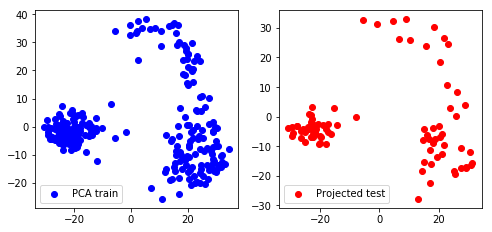

In [13]:
plt.figure(figsize=(8,8))
ax1 = plt.subplot(2,2,1)
ax1.scatter(X_train_pca[:, 0], X_train_pca[:, 1], label='PCA train', c='b')
ax1.legend();
ax2 = plt.subplot(2,2,2)
ax2.scatter(X_test_projected[:, 0], X_test_projected[:, 1], label='Projected test', c='r')
ax2.legend();

In [24]:
pca = PCA(2)
X_pca = pca.fit_transform(X)

In [40]:
pca.components_.shape

(2, 64)

In [30]:
X_stacked = np.vstack((X_train_pca, X_test_projected))

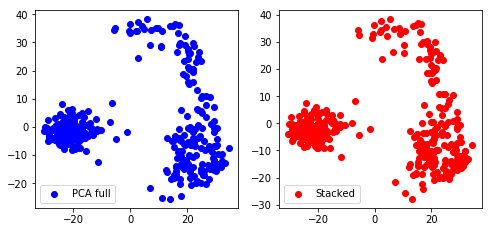

In [31]:
plt.figure(figsize=(8,8))
ax1 = plt.subplot(2,2,1)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], label='PCA full', c='b')
ax1.legend();
ax2 = plt.subplot(2,2,2)
ax2.scatter(X_stacked[:, 0], X_stacked[:, 1], label='Stacked', c='r')
ax2.legend();

In [35]:
df_pca = pd.DataFrame(X_pca)
df_pca.describe()

0    7.302800e-16
1    9.640437e-16
dtype: float64


,0,1
count,3.600000e+02,3.600000e+02
mean,7.302800e-16,9.640437e-16
std,2.191754e+01,1.347752e+01
min,-3.012154e+01,-2.559891e+01
25%,-2.188265e+01,-6.757270e+00
50%,-8.084800e-01,-2.388458e+00
75%,2.123127e+01,1.660780e+00
max,3.466563e+01,3.826116e+01


In [34]:
df_stacked = pd.DataFrame(X_stacked)
df_stacked.describe()

0   -0.495542
1   -0.609774
dtype: float64


,0,1
count,360.000000,360.000000
mean,-0.495542,-0.609774
std,21.907700,13.496963
min,-30.756675,-27.778624
25%,-22.395049,-7.459561
50%,-1.350762,-3.196562
75%,20.592430,0.779262
max,34.568262,38.290894


In [45]:
def bootstrap(X, nsamples, batch_size):
    for i in range(nsamples):
        np.random.seed(42)
        perm = np.random.permutation(len(X))
        X = X[perm]
        X_batch = X[0:batch_size]
        yield X_batch

In [72]:
# Обучим PCA(2) на выборке, дов. интервал главной компоненты и занесем в массив, затем усредним
nsamples= 10
batch_size = 60

root_n = math.sqrt(batch_size)
Z = 1.96 # 0,95 confedence

component_dataset = []
for X_batch in bootstrap(X, nsamples, batch_size):
    pca = PCA(2)
    X_batch_pca = pca.fit_transform(X_batch)
    
    confedence = Z*(pca.components_[0].std())/root_n
    component_dataset.append(confedence)

In [73]:
pca = PCA(2)
pca.fit_transform(X)
print("pca.components_[0].mean(): ", pca.components_[0].mean())
print("Interval: " + 
      str(pca.components_[0].mean() - np.array(component_dataset).mean()) +
      " < PCA_1st_component_mean < " +
      str(pca.components_[0].mean() + np.array(component_dataset).mean()))

pca.components_[0].mean():  -0.002435299740140627
Interval: -0.034037725584619004 < PCA_1st_component_mean < 0.029167126104337752


## Задание 6.2. (Дома)

1. Отшкалируйте данные
2. Найдите первые две главные компоненты данных и спроецируйте на них данные (постройте диаграмму рассеяния)
3. Посмотрите долю объясненной дисперсии первых двух главных компонент
4. Сколько необходимо компонент чтобы обяснить 90% дисперсии исходных данных.

In [81]:
from utils import process_titanic_features
from sklearn.preprocessing import StandardScaler

In [77]:
path='./day5/titanic/'
data_train = pd.read_csv('{}train.csv'.format(path), index_col=0)
X, _, _ = process_titanic_features(data_train)
y = X['Survived'].values
X = X.drop('Survived', axis=1).values

/home/care1e55/progz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/storage/Study/DBO/ml/utils.py:58: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  df[['Name_len', 'Age', 'Fare']] = scaler.transform(df[['Name_len', 'Age', 'Fare']])


In [84]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [85]:
pca = PCA(2)
pca.fit_transform(scaled_X)

array([[-1.62333816,  0.03907965],
       [ 4.17079002, -0.63965054],
       [-1.2382366 ,  0.10620016],
       ...,
       [-0.55050098,  1.63588971],
       [ 2.69390042, -2.13889734],
       [-1.60839774, -2.84199472]])

In [88]:
pca.explained_variance_ratio_

array([0.24621729, 0.15740892])

In [97]:
pca = PCA(8)
pca.fit_transform(scaled_X)

array([[-1.62333816,  0.03907965, -0.06764688, ..., -0.15544972,
        -0.26132632, -0.50419518],
       [ 4.17079002, -0.63965054,  1.17405749, ..., -1.56522879,
         0.34982389, -1.41585987],
       [-1.2382366 ,  0.10620016,  0.144778  , ..., -0.98848083,
        -0.71245431,  0.50240664],
       ...,
       [-0.55050098,  1.63588971,  2.10545204, ..., -0.99685526,
         0.72817982,  0.93323313],
       [ 2.69390042, -2.13889734, -0.52519878, ..., -0.08683367,
        -0.64625606, -0.36654317],
       [-1.60839774, -2.84199472,  0.36301903, ...,  1.68680313,
         0.08852337,  0.01296158]])

In [98]:
pca.explained_variance_ratio_.sum()

0.9099831343330362